In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
title_df = pd.read_csv('netflix_titles.csv')
title_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
title_df.shape

(6234, 12)

In [6]:
title_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
title_df['rating'].nunique()

14

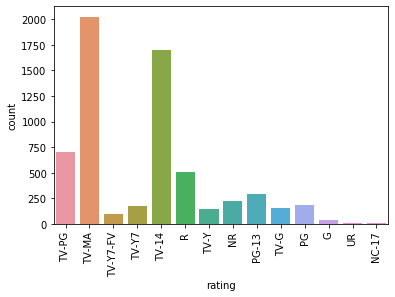

In [14]:
g = sns.countplot(title_df['rating'])
for label in g.get_xticklabels():
    label.set_rotation(90)

In [32]:
title_df =title_df.fillna(0)
title_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [33]:
ratings = list(title_df['rating'].unique())
ratings

['TV-PG',
 'TV-MA',
 'TV-Y7-FV',
 'TV-Y7',
 'TV-14',
 'R',
 'TV-Y',
 'NR',
 'PG-13',
 'TV-G',
 'PG',
 'G',
 0,
 'UR',
 'NC-17']

In [34]:
n_rows = len(ratings)
n_rows

15

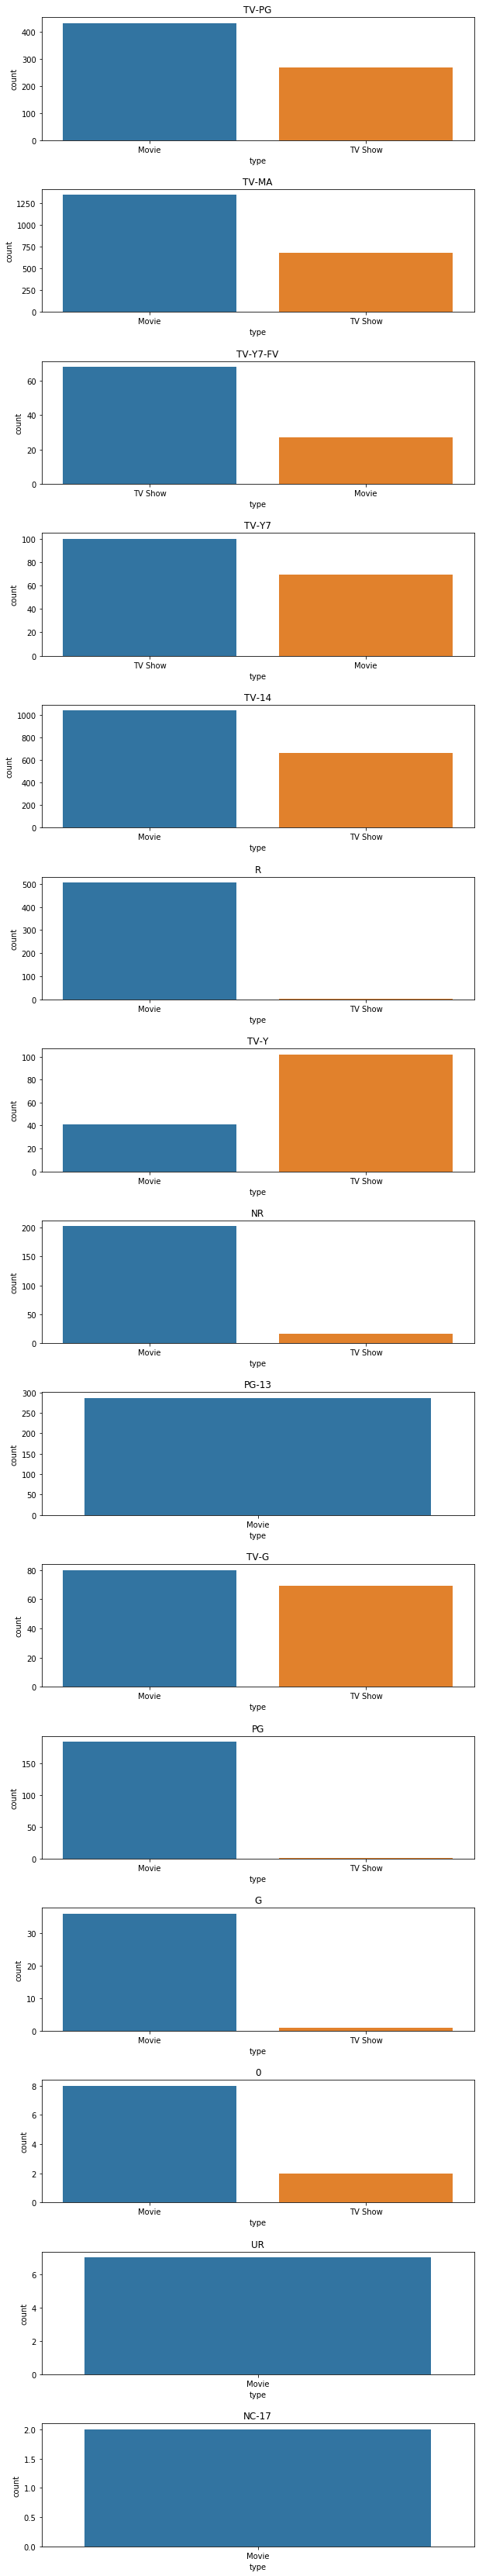

In [35]:
fig, ax = plt.subplots(n_rows, 1, figsize=(10,60))
fig.subplots_adjust(hspace = 0.4, wspace = 0.4)
for i , name in enumerate(ratings):
    df = title_df[title_df['rating'] == name]
    sns.countplot(df['type'], ax = ax[i]).set_title(name)

In [40]:
title_df.groupby('rating')['show_id'].count()

rating
0             10
G             37
NC-17          2
NR           218
PG           184
PG-13        286
R            508
TV-14       1698
TV-G         149
TV-MA       2027
TV-PG        701
TV-Y         143
TV-Y7        169
TV-Y7-FV      95
UR             7
Name: show_id, dtype: int64

In [44]:
table = pd.pivot_table(title_df, values = 'show_id', index = 'rating', columns = 'type', aggfunc='count').fillna(0)
table

type,Movie,TV Show
rating,,
0,8.0,2.0
G,36.0,1.0
NC-17,2.0,0.0
NR,202.0,16.0
PG,183.0,1.0
PG-13,286.0,0.0
R,506.0,2.0
TV-14,1038.0,660.0
TV-G,80.0,69.0


In [48]:
table_2 = pd.DataFrame(table).reset_index()

In [49]:
table_2

type,rating,Movie,TV Show
0,0,8.0,2.0
1,G,36.0,1.0
2,NC-17,2.0,0.0
3,NR,202.0,16.0
4,PG,183.0,1.0
5,PG-13,286.0,0.0
6,R,506.0,2.0
7,TV-14,1038.0,660.0
8,TV-G,80.0,69.0
9,TV-MA,1348.0,679.0
